## Data Cleaning - The Iris Dataset

As data cleaning is an important part of the data analytics jobs, in this notebook I'm practising using various techiques to clean a modified version of the famous Iris-dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
iris = pd.read_csv('iris-data.csv')

In [3]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset exploration

In [4]:
iris.shape

(150, 5)

In [5]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [6]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


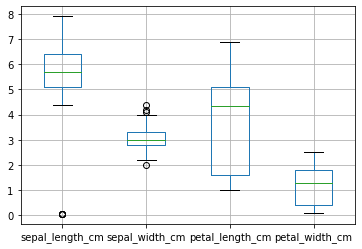

In [7]:
iris.boxplot()

We see that we have some likely outliers in sepal_length column(close to 0 value) and we can further examine the other columns as well

In [8]:
iris[iris['sepal_length_cm'] < iris['sepal_length_cm'].min()* 1.5 ].head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [9]:
#Lets evaluate the types individually

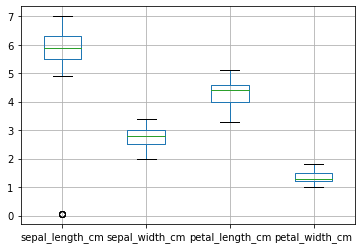

In [10]:
iris[iris['class']=='Iris-versicolor'].boxplot()

As we can see that these two rows significalt differ from the sepal length, but their width falls close to the median value. We can replace these lengths with the mean values. 

In [11]:
mean_sepal_length = iris[iris['class']=='Iris-versicolor']['sepal_length_cm'].mean()
min_sepal_length = iris['sepal_length_cm'].min() * 1.5
iris['sepal_length_cm'] = iris['sepal_length_cm'].apply(lambda x: mean_sepal_length if x < min_sepal_length else x)

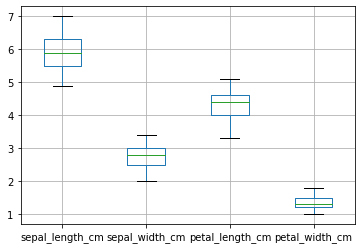

In [12]:
iris[iris['class']=='Iris-versicolor'].boxplot()

### Dealing with Null Values

In [13]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

There are five missing values in the petal_width_cm

In [14]:
 iris[iris.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


So all the missing values for petal_width_cm are for Setosas. From domain knowledge we can understand that that all setosas fall to the range, we will be replacing the values with mean values

In [15]:
mean_petal_width = iris[iris['class']=='Iris-setosa']['petal_width_cm'].mean()
iris['petal_width_cm'] = iris['petal_width_cm'].fillna(mean_petal_width)

In [16]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

### Unique Values for Class

In [17]:
# Check for unique value counts for the class
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

There is actually only 3 types of classes for the iris flower. Virgnia, Setosa, Versicolor. We will update these values. 

In [18]:
def class_clean(x):
    if re.search('setos', x):
        x ="Setosa"
    elif re.search('virgi', x):
        x ='Virginica'
    else:
        x = 'Versicolor'
    return x

In [19]:
iris_cleaned = iris
iris_cleaned['class'] = iris['class'].apply(lambda x: class_clean(x))

In [20]:
iris_cleaned['class'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: class, dtype: int64

In [21]:
# Check for duplicates
iris_cleaned[iris_cleaned.duplicated(keep=False)==True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
34,4.9,3.1,1.5,0.1,Setosa
37,4.9,3.1,1.5,0.1,Setosa
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


In [22]:
# We will be dropping duplicate rows from this dataset. They are likely to distract our modeling and we alrady have the same information in one row

iris_cleaned = iris_cleaned[iris_cleaned.duplicated()==False]
print(iris_cleaned.shape)

(148, 5)


In [23]:
# Save cleaned dataset

In [24]:
iris_cleaned = iris_cleaned.to_csv('iris_cleaned.csv')